# Data uploading

In [ ]:
!pip install world_bank_data --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for world-bank-data: filename=world_bank_data-0.1.3-py3-none-any.whl size=11110 sha256=7bf9ddb314884a5bda7a040a96b464bf16b15dcb0d0f39b41654311b5be4cab6
  Stored in directory: /root/.cache/pip/wheels/fe/17/0c/9ef630351acc5856f4a1814d96bc082eccf1cbbb779fcd1a98
Successfully built world-bank-data


In [ ]:
import os
import json
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

import world_bank_data as wb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Northeastern/Projects/IE6600 Final Project/

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/Northeastern/Projects/IE6600 Final Project/'
/content


# ways to get 'country_chosen' List

In [ ]:
from google.colab import files
files.upload()

In [16]:
wi_df = pd.read_csv('World Bank Selected Indicators - Sheet1.csv')

In [ ]:
indicators = list(wi_df['Indicator Code'].dropna())

In [18]:
data = pd.DataFrame()
for ind in indicators:
    data2 = wb.get_series(ind, date='1990:2020', id_or_value='id', simplify_index=True)
    data = pd.concat([data, data2], axis=1)

In [20]:
data.to_csv('All_Indicators_Data.csv')

In [ ]:
!ls -la

total 8101
-rw------- 1 root root 8168758 Dec 12 23:33  All_Indicators_Data.csv
drwx------ 2 root root    4096 Nov 15 00:27  Codes
drwx------ 2 root root    4096 Dec  4 05:44  config
drwx------ 2 root root    4096 Nov 13 20:17  Data
-rw------- 1 root root   12479 Nov 22 19:35 'IE6600 19905 Project Guidelines.docx'
-rw------- 1 root root   13032 Nov 16 22:57 'IE6600 Factors influencing Inflation and Recession.docx'
drwx------ 2 root root    4096 Nov 13 21:21  Video
-rw------- 1 root root   61743 Dec  9 05:02  visualizing_missing_data_with_barplot_Seaborn_distplot.png
-rw------- 1 root root     178 Dec  9 04:57 'World Bank Selected Indicators.gsheet'
-rw------- 1 root root   20663 Dec  9 04:58 'World Bank Selected Indicators - Sheet1.csv'


In [21]:
data = pd.read_csv('All_Indicators_Data.csv', index_col=([0,1]))
data

NY.GDP.MKTP.KD.ZG  GC.XPN.INTP.CN  GC.XPN.TOTL.GD.ZS  \
AFE 1990          -0.039677             NaN                NaN   
    1991           0.105301             NaN                NaN   
    1992          -1.979118             NaN                NaN   
    1993          -0.392300             NaN                NaN   
    1994           2.025857             NaN                NaN   
...                     ...             ...                ...   
ZWE 2016           0.755869     142501584.0          25.236347   
    2017           4.709492     229797540.0          28.413719   
    2018           4.824211     761307154.0          20.697183   
    2019          -6.144236             NaN                NaN   
    2020          -6.248748             NaN                NaN   

          GC.DOD.TOTL.GD.ZS  NY.GDP.MKTP.CD  ...  SH.IMM.MEAS  \
AFE 1990                NaN    2.532240e+11  ...    59.305126   
    1991                NaN    2.734028e+11  ...    53.933170   
    1992                NaN    2.382554e+11  ...    53.950285   
    1993                NaN    2.365269e+11  ...    56.196562   
    1994                NaN    2.401201e+11  ...    61.210240   
...                     ...             ...  ...          ...   
ZWE 2016                NaN    2.054868e+10  ...    95.000000   
    2017                NaN    1.758489e+10  ...    90.000000   
    2018                NaN    1.811554e+10  ...    88.000000   
    2019                NaN    1.928429e+10  ...    85.000000   
    2020                NaN    1.805117e+10  ...    85.000000   

          SP.POP.1564.TO.ZS.1  SP.POP.1564.TO.ZS.2  SL.TLF.TOTL.IN  \
AFE 1990            51.430660            51.430660     120062718.0   
    1991            51.477748            51.477748     123616494.0   
    1992            51.587893            51.587893     127344638.0   
    1993            51.746670            51.746670     131230462.0   
    1994            51.937393            51.937393     135250938.0   
...                       ...                  ...             ...   
ZWE 2016            54.473134            54.473134       6802164.0   
    2017            54.505941            54.505941       6909356.0   
    2018            54.659410            54.659410       7028775.0   
    2019            54.861265            54.861265       7156060.0   
    2020            55.074722            55.074722       7204228.0   

          SP.POP.1564.TO  
AFE 1990     156682481.0  
    1991     161328531.0  
    1992     166252340.0  
    1993     171418905.0  
    1994     176784467.0  
...                  ...  
ZWE 2016       7642765.0  
    2017       7759792.0  
    2018       7892169.0  
    2019       8034692.0  
    2020       8185716.0  

[8246 rows x 101 columns]

In [97]:
chosen = ['AUS','CHN','IDN','JPN','KOR','RMN','MYS','PHL','SGP','SLB','THA',
          'AUT','BGR','BLR','CHE','CYP','CZE','DEU','DNK','ESP','EST','FIN','FRA','FRO','GBR','GRC','HUN','IRL','ISL','ITA','NLD','NOR','ROU','RUS','SWE','TUR','UKR',
          'ARG','BHS','BLZ','BOL','BRA','CHL','COL','CRI','DOM','ECU','GTM','HND','HTI','JAM','MEX','NIC','PAN','PER','PRY','SLV','URY',
          'EGY','JOR','LBN','MAR','MLT','OMN','SAU','TUN','CAN','USA',
          'BGD','BTN','IND','LKA','NPL','PAK']

# ways to get Clean_data.csv

In [98]:
chosen_data = data.loc[chosen,:,:]
chosen_data.loc['CAN',:,:]

NY.GDP.MKTP.KD.ZG  GC.XPN.INTP.CN  GC.XPN.TOTL.GD.ZS  \
CAN 1990                NaN    4.214400e+10          24.187406   
    1991                NaN    4.131100e+10          25.457738   
    1992                NaN    3.979600e+10          25.619991   
    1993                NaN    3.948900e+10          25.217027   
    1994                NaN    4.042500e+10          23.823221   
...                     ...             ...                ...   
    2016           1.001394    2.254300e+10          17.498604   
    2017           3.039880    2.213000e+10          17.606595   
    2018           2.777041    2.465200e+10          17.540900   
    2019           1.879592    2.582400e+10          18.114917   
    2020          -5.233024    2.331800e+10          29.042752   

          GC.DOD.TOTL.GD.ZS  NY.GDP.MKTP.CD  ...  SH.IMM.MEAS  \
CAN 1990                NaN    5.939296e+11  ...         89.0   
    1991                NaN    6.103282e+11  ...         92.0   
    1992                NaN    5.923877e+11  ...         94.0   
    1993                NaN    5.771708e+11  ...         96.0   
    1994                NaN    5.781393e+11  ...         97.0   
...                     ...             ...  ...          ...   
    2016          52.808668    1.527995e+12  ...         89.0   
    2017          50.225797    1.649266e+12  ...         90.0   
    2018          48.181531    1.725329e+12  ...         90.0   
    2019          48.011633    1.742015e+12  ...         90.0   
    2020          72.085823    1.645423e+12  ...         90.0   

          SP.POP.1564.TO.ZS.1  SP.POP.1564.TO.ZS.2  SL.TLF.TOTL.IN  \
CAN 1990            68.055081            68.055081      14746930.0   
    1991            67.930708            67.930708      14812002.0   
    1992            67.806047            67.806047      14793920.0   
    1993            67.705364            67.705364      14881272.0   
    1994            67.656179            67.656179      15018804.0   
...                       ...                  ...             ...   
    2016            67.646956            67.646956      19955331.0   
    2017            67.287472            67.287472      20218237.0   
    2018            66.897742            66.897742      20396646.0   
    2019            66.506203            66.506203      20792599.0   
    2020            66.120386            66.120386      20509919.0   

          SP.POP.1564.TO  
CAN 1990      18845226.0  
    1991      19046018.0  
    1992      19237433.0  
    1993      19421124.0  
    1994      19620741.0  
...                  ...  
    2016      24426969.0  
    2017      24590365.0  
    2018      24795704.0  
    2019      25007150.0  
    2020      25150346.0  

[31 rows x 101 columns]

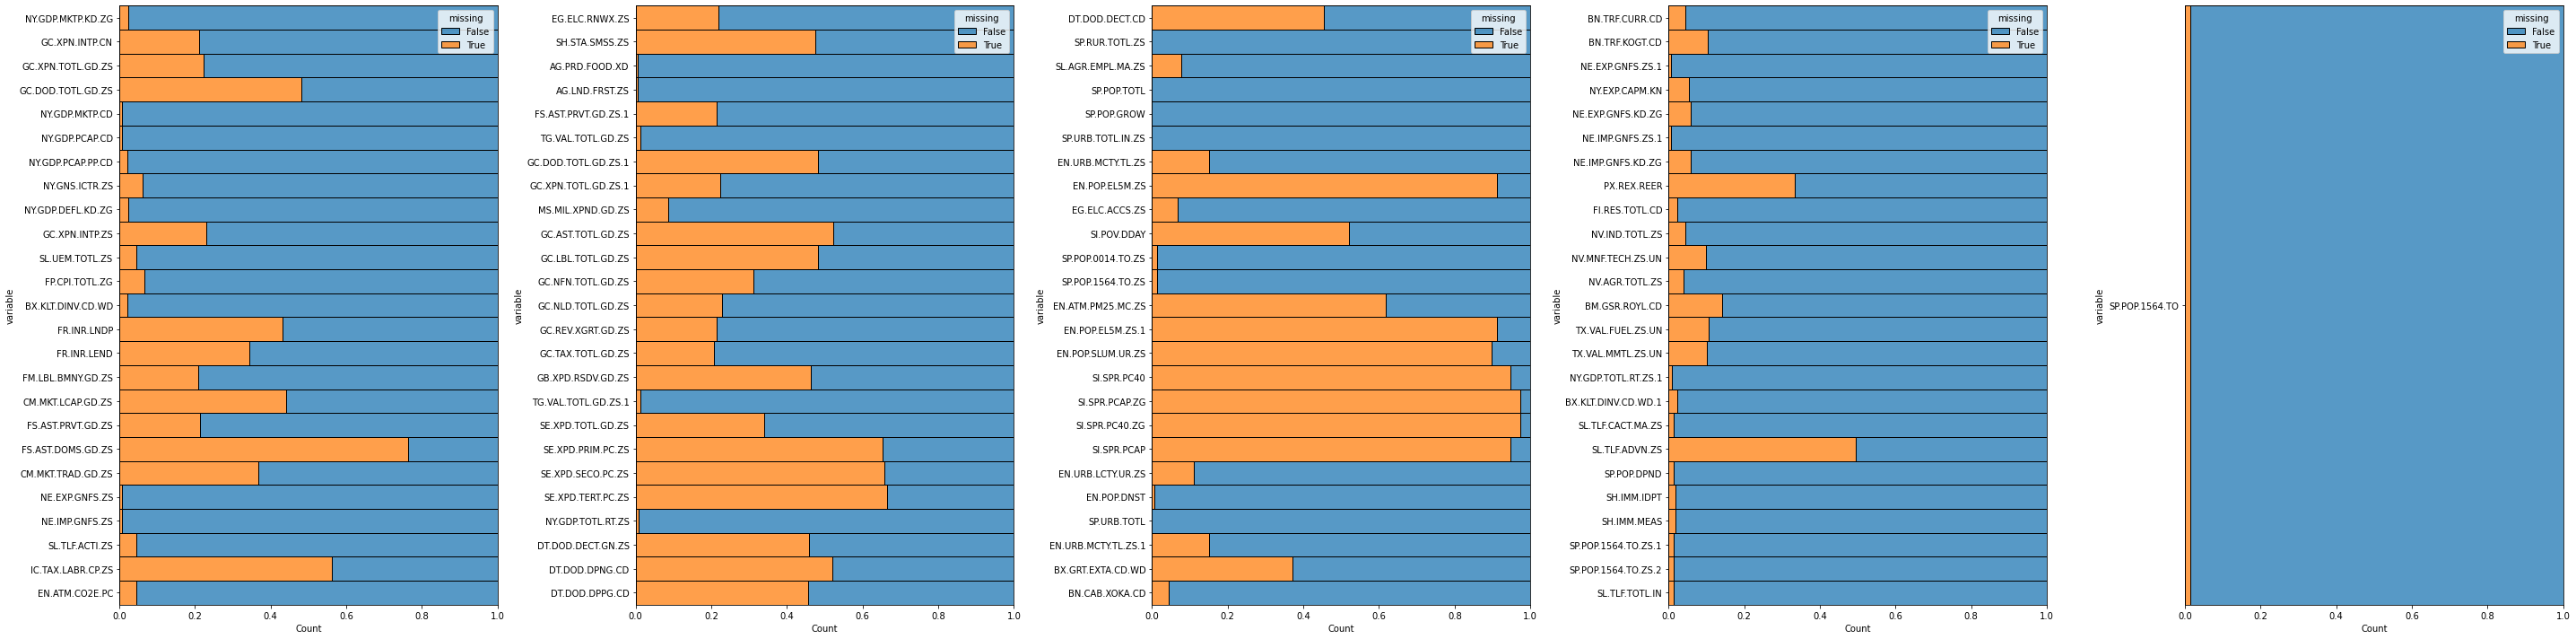

In [92]:
fig, axs = plt.subplots(1, 5, figsize = (40,10))
for i in range(5):
    sns.histplot(
        data=chosen_data.iloc[:,i*25:(i+1)*25].isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        ax = axs[i]
    )
plt.tight_layout()
# plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [82]:
for x in data.columns:
    print(x)

NY.GDP.MKTP.KD.ZG
GC.XPN.INTP.CN
GC.XPN.TOTL.GD.ZS
GC.DOD.TOTL.GD.ZS
NY.GDP.MKTP.CD
NY.GDP.PCAP.CD
NY.GDP.PCAP.PP.CD
NY.GNS.ICTR.ZS
NY.GDP.DEFL.KD.ZG
GC.XPN.INTP.ZS
SL.UEM.TOTL.ZS
FP.CPI.TOTL.ZG
BX.KLT.DINV.CD.WD
FR.INR.LNDP
FR.INR.LEND
FM.LBL.BMNY.GD.ZS
CM.MKT.LCAP.GD.ZS
FS.AST.PRVT.GD.ZS
FS.AST.DOMS.GD.ZS
CM.MKT.TRAD.GD.ZS
NE.EXP.GNFS.ZS
NE.IMP.GNFS.ZS
SL.TLF.ACTI.ZS
IC.TAX.LABR.CP.ZS
EN.ATM.CO2E.PC
EG.ELC.RNWX.ZS
SH.STA.SMSS.ZS
AG.PRD.FOOD.XD
AG.LND.FRST.ZS
FS.AST.PRVT.GD.ZS.1
TG.VAL.TOTL.GD.ZS
GC.DOD.TOTL.GD.ZS.1
GC.XPN.TOTL.GD.ZS.1
MS.MIL.XPND.GD.ZS
GC.AST.TOTL.GD.ZS
GC.LBL.TOTL.GD.ZS
GC.NFN.TOTL.GD.ZS
GC.NLD.TOTL.GD.ZS
GC.REV.XGRT.GD.ZS
GC.TAX.TOTL.GD.ZS
GB.XPD.RSDV.GD.ZS
TG.VAL.TOTL.GD.ZS.1
SE.XPD.TOTL.GD.ZS
SE.XPD.PRIM.PC.ZS
SE.XPD.SECO.PC.ZS
SE.XPD.TERT.PC.ZS
NY.GDP.TOTL.RT.ZS
DT.DOD.DECT.GN.ZS
DT.DOD.DPNG.CD
DT.DOD.DPPG.CD
DT.DOD.DECT.CD
SP.RUR.TOTL.ZS
SL.AGR.EMPL.MA.ZS
SP.POP.TOTL
SP.POP.GROW
SP.URB.TOTL.IN.ZS
EN.URB.MCTY.TL.ZS
EN.POP.EL5M.ZS
EG.ELC.ACCS.ZS
SI.POV.DDAY
SP.PO

In [99]:
b = pd.DataFrame()
a = ['FS.AST.DOMS.GD.ZS', 'IC.TAX.LABR.CP.ZS', 'SE.XPD.TOTL.GD.ZS', 'SE.XPD.PRIM.PC.ZS', 'SE.XPD.SECO.PC.ZS', 'SE.XPD.TERT.PC.ZS',
     'EN.POP.EL5M.ZS', 'EN.ATM.PM25.MC.ZS','EN.POP.SLUM.UR.ZS','SI.SPR.PCAP.ZG','SI.SPR.PC40.ZG','SI.SPR.PCAP', 'SI.SPR.PC40',
     'SL.TLF.ADVN.ZS', 'SH.STA.SMSS.ZS', 'GB.XPD.RSDV.GD.ZS', 'DT.DOD.DECT.GN.ZS', 'DT.DOD.DPNG.CD', 'BX.GRT.EXTA.CD.WD',

]
for c in a:
    b = pd.concat([b, wb.get_indicators(c)])

b.head(20)

,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
FS.AST.DOMS.GD.ZS,Domestic credit provided by financial sector (...,,World Development Indicators,Domestic credit provided by the financial sect...,"International Monetary Fund, International Fin...",Financial Sector
IC.TAX.LABR.CP.ZS,Labor tax and contributions (% of commercial p...,,World Development Indicators,Labor tax and contributions is the amount of t...,"World Bank, Doing Business project (http://www...",Private Sector
SE.XPD.TOTL.GD.ZS,"Government expenditure on education, total (% ...",,World Development Indicators,General government expenditure on education (c...,UNESCO Institute for Statistics (http://uis.un...,Education
SE.XPD.PRIM.PC.ZS,"Government expenditure per student, primary (%...",,World Development Indicators,Government expenditure per student is the aver...,UNESCO Institute for Statistics (http://uis.un...,Education
SE.XPD.SECO.PC.ZS,"Government expenditure per student, secondary ...",,World Development Indicators,Government expenditure per student is the aver...,UNESCO Institute for Statistics (http://uis.un...,Education
...,...,...,...,...,...,...
SH.STA.SMSS.ZS,People using safely managed sanitation service...,,World Development Indicators,The percentage of people using improved sanita...,WHO/UNICEF Joint Monitoring Programme (JMP) fo...,"Health ,Environment"
GB.XPD.RSDV.GD.ZS,Research and development expenditure (% of GDP),,World Development Indicators,Gross domestic expenditures on research and de...,UNESCO Institute for Statistics (http://uis.un...,Science & Technology
DT.DOD.DECT.GN.ZS,External debt stocks (% of GNI),,World Development Indicators,Total external debt stocks to gross national i...,"World Bank, International Debt Statistics.","Economy & Growth,External Debt"


In [100]:
a = a +['EN.POP.EL5M.ZS.1','GC.DOD.TOTL.GD.ZS','SI.POV.DDAY','GC.AST.TOTL.GD.ZS',
        'DT.DOD.DPPG.CD','DT.DOD.DECT.CD','SI.POV.DDAY','EN.POP.EL5M.ZS.1','PX.REX.REER','FR.INR.LNDP',
        'GC.DOD.TOTL.GD.ZS.1','GC.LBL.TOTL.GD.ZS']
chosen_data2 = chosen_data.drop(columns=a, axis=1)
chosen_data2.shape

(2263, 72)

In [101]:
chosen_data2

NY.GDP.MKTP.KD.ZG  GC.XPN.INTP.CN  GC.XPN.TOTL.GD.ZS  \
AUS 1990           3.573507    7.364000e+09          21.822977   
    1991          -0.395087    6.192000e+09          23.171087   
    1992           0.413780    5.748000e+09          24.439892   
    1993           4.033567    5.413000e+09          24.969497   
    1994           3.980474    6.630000e+09          25.092045   
...                     ...             ...                ...   
PAK 2016           5.526736             NaN                NaN   
    2017           4.432626             NaN                NaN   
    2018           6.151703             NaN                NaN   
    2019           2.497637             NaN                NaN   
    2020          -1.329520             NaN                NaN   

          NY.GDP.MKTP.CD  NY.GDP.PCAP.CD  ...  SH.IMM.MEAS  \
AUS 1990    3.113267e+11    18243.471418  ...         86.0   
    1991    3.259030e+11    18855.761996  ...         86.0   
    1992    3.254803e+11    18604.188270  ...         86.0   
    1993    3.121262e+11    17667.187100  ...         86.0   
    1994    3.228073e+11    18079.380179  ...         86.0   
...                  ...             ...  ...          ...   
PAK 2016    3.136299e+11     1540.184503  ...         75.0   
    2017    3.392056e+11     1631.531909  ...         76.0   
    2018    3.561282e+11     1678.043150  ...         79.0   
    2019    3.209095e+11     1481.813864  ...         81.0   
    2020    3.003063e+11     1359.514522  ...         83.0   

          SP.POP.1564.TO.ZS.1  SP.POP.1564.TO.ZS.2  SL.TLF.TOTL.IN  \
AUS 1990            66.851833            66.851833       8475893.0   
    1991            66.860327            66.860327       8524976.0   
    1992            66.781131            66.781131       8601726.0   
    1993            66.662599            66.662599       8634061.0   
    1994            66.582205            66.582205       8799677.0   
...                       ...                  ...             ...   
PAK 2016            59.986274            59.986274      67672977.0   
    2017            60.207543            60.207543      68865484.0   
    2018            60.417411            60.417411      70047904.0   
    2019            60.623214            60.623214      71659613.0   
    2020            60.831787            60.831787      71809320.0   

          SP.POP.1564.TO  
AUS 1990      11408332.0  
    1991      11556139.0  
    1992      11683359.0  
    1993      11777281.0  
    1994      11888253.0  
...                  ...  
PAK 2016     122150863.0  
    2017     125175221.0  
    2018     128222837.0  
    2019     131288856.0  
    2020     134372752.0  

[2263 rows x 72 columns]

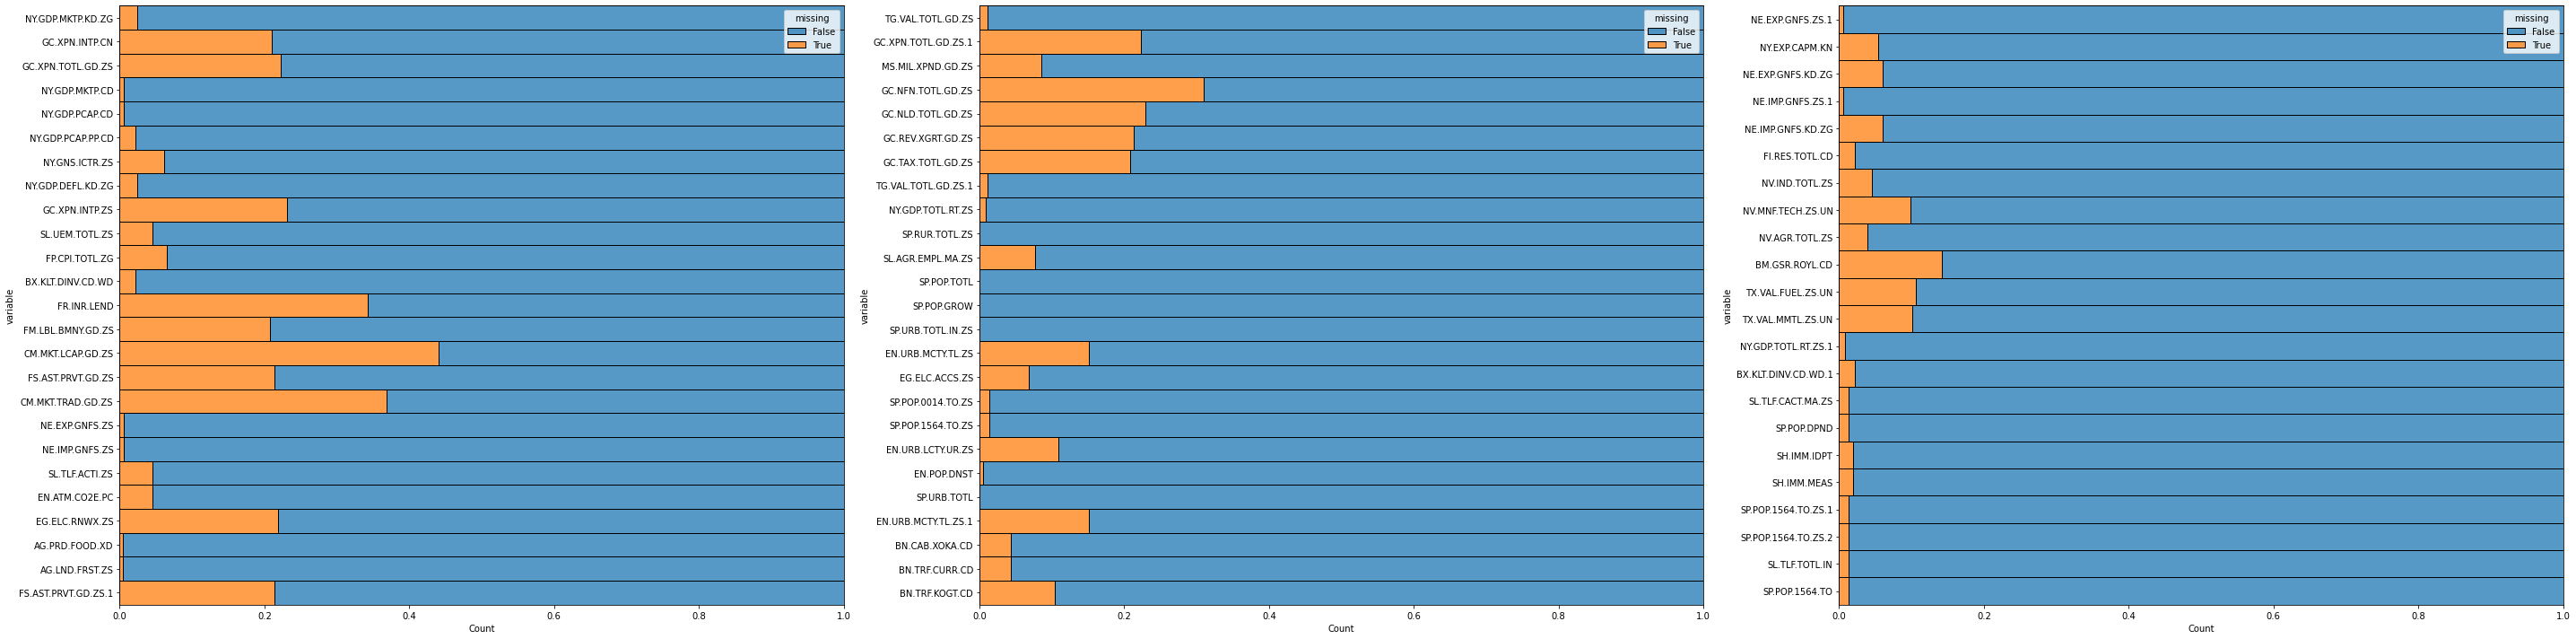

In [103]:
fig, axs = plt.subplots(1, 3, figsize = (40,10))
for i in range(3):
    sns.histplot(
        data=chosen_data2.iloc[:,i*25:(i+1)*25].isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        ax = axs[i]
    )
plt.tight_layout()
# plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [104]:
chosen_data2.reset_index(inplace=True)

In [105]:
import plotly.express as px
fig = px.choropleth(chosen_data2, locations="level_0",
                    color="NY.GDP.MKTP.KD.ZG", 
                    hover_name="level_0",
                    color_continuous_scale=px.colors.sequential.Viridis,
                    animation_frame='level_1',
                    )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Save dataframe into Clean_data.csv

In [106]:
chosen_data2.to_csv('Cleaned_Data.csv')